In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect("mydb.db")

In [ ]:
connection

In [4]:
table_creation_query = """
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [5]:
table_creation_query2 = """
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [6]:
table_creation_query3 = """
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [7]:
cursor = connection.cursor()

In [ ]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [9]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [10]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [ ]:
cursor.executemany(insert_query, employee_data)
cursor.executemany(insert_query_customers, customers_data)
cursor.executemany(insert_query_orders, orders_data)

In [12]:
connection.commit()

In [ ]:
cursor.execute("select * from orders;")

In [ ]:
for row in cursor.fetchall():
    print(row)

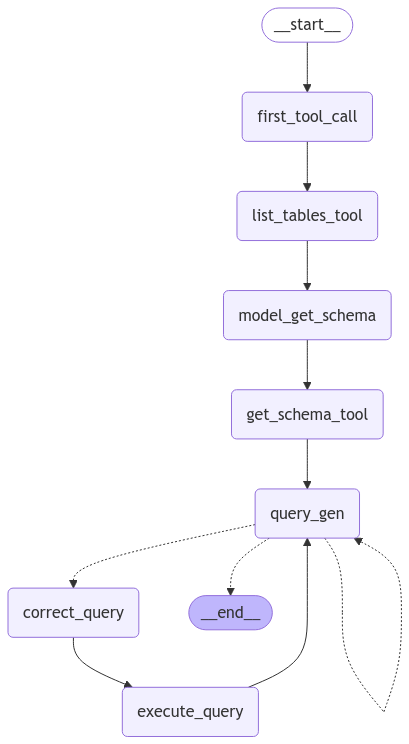

In [15]:
from langchain_community.utilities import SQLDatabase

In [16]:
db = SQLDatabase.from_uri("sqlite:///mydb.db")

In [ ]:
db

In [ ]:
db.dialect

In [ ]:
db.get_usable_table_names()

In [20]:
from langchain_groq import ChatGroq

from dotenv import load_dotenv

load_dotenv()
llm = ChatGroq(model="llama3-70b-8192")

In [ ]:
llm.invoke("hello how are you?")

In [22]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [23]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

In [24]:
tools = toolkit.get_tools()

In [ ]:
tools

In [ ]:
for tool in tools:
    print(tool.name)

In [27]:
list_tables_tool = next(
    (tool for tool in tools if tool.name == "sql_db_list_tables"), None
)

In [ ]:
list_tables_tool

In [29]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [ ]:
get_schema_tool

In [ ]:
list_tables_tool.invoke("")

In [ ]:
print(get_schema_tool.invoke("customers, orders"))

The method `run_no_throw()` suggests that it executes a query (likely against a database) and handles exceptions internally without throwing them to the caller. The goal is typically to ensure the program continues running smoothly even if the query fails.

### Key Features of `run_no_throw()`
1. **Execute a Query**: Runs the SQL query passed as an argument.
2. **Error Handling**: Catches and suppresses exceptions, such as SQL syntax errors or connection issues, instead of letting them propagate.
3. **Returns a Result**: Often, it either:
   - Returns the query result if successful.
   - Returns a fallback value (like `None` or an empty dataset) in case of failure.

### Why Use `run_no_throw()`?
- **Resilience**: Ensures the application doesn't crash due to unexpected database errors.
- **Simplified Code**: Avoids the need for explicit `try...except` blocks around each database query.
- **Controlled Behavior**: Offers predictable behavior in scenarios where the query might fail (e.g., in exploratory or error-prone tasks).

### Example Implementation
If you were implementing such a method in Python, it might look like this:

```python
class Database:
    def run_no_throw(self, query):
        try:
            # Assume `self.connection` is a valid database connection
            cursor = self.connection.cursor()
            cursor.execute(query)
            return cursor.fetchall()  # Or another method to retrieve results
        except Exception as e:
            print(f"Error executing query: {e}")
            return None  # Fallback value
```

### Usage Example
```python
db = Database()

# A safe way to run queries without crashing the program
result = db.run_no_throw("SELECT * FROM users WHERE age > 30")

if result is not None:
    print("Query executed successfully:", result)
else:
    print("Query failed, but the program continues running.")
```

### When to Use It
- **Testing/Debugging**: To test queries without interrupting the workflow.
- **Non-Critical Queries**: For queries where failure can be safely ignored or logged.
- **Fail-Safe Operations**: When the system must keep running regardless of individual query outcomes.

If this function is part of a specific library or framework, its exact behavior might vary, but it generally follows this pattern. If you're working in a specific framework, its documentation might provide more details.

In [33]:
from langchain_core.tools import tool


@tool
def db_query_tool(query: str) -> str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result = db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [ ]:
db.run("SELECT * FROM Employees;")

In [ ]:
db_query_tool.invoke("SELECT * FROM Employees;")

In [36]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
# from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [38]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL should have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting identifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages(
    [("system", query_check_system), ("placeholder", "{messages}")]
)

query_check = query_check_prompt | llm.bind_tools([db_query_tool])

In [ ]:
query_check.invoke({"messages": [("user", "SELECT * FROM Employees")]})

In [40]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""

    final_answer: str = Field(..., description="The final answer to the user")


# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

Output the SQL query that answers the input question without a tool call.

Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.

If you get an error while executing a query, rewrite the query and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set.
NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer."""


query_gen_prompt = ChatPromptTemplate.from_messages(
    [("system", query_gen_system), ("placeholder", "{messages}")]
)

query_gen = query_gen_prompt | llm.bind_tools([SubmitFinalAnswer])

In [41]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [42]:
def first_tool_call(state: State) -> dict[str, list[AIMessage]]:
    return {
        "messages": [
            AIMessage(
                content="",
                tool_calls=[
                    {"name": "sql_db_list_tables", "args": {}, "id": "tool_abcd123"}
                ],
            )
        ]
    }

In [43]:
def handle_tool_error(state: State):
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    print(tool_calls, " Tool calls")
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }

In [44]:
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    # print(ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error"))
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )

In [45]:
def model_check_query(state: State):
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

In [46]:
def query_gen_node(state: State):
    message = query_gen.invoke(state)
    print(state, " State")
    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            print("Tool Name ", tc["name"])
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    print({"messages": [message] + tool_messages})
    return {"messages": [message] + tool_messages}

In [47]:
def should_continue(state: State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [48]:
def get_list_tables_tool(state: State):
    list_tables_tool = next(
        (tool for tool in tools if tool.name == "sql_db_list_tables"), None
    )
    resp = list_tables_tool.invoke("")
    return {"messages": resp}

In [49]:
workflow = StateGraph(State)

In [ ]:
workflow.add_node("list_tables_tool", get_list_tables_tool)
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node(
    "model_get_schema",
    lambda state: {
        "messages": [model_get_schema.invoke(state["messages"])],
    },
)
workflow.add_node("query_gen", query_gen_node)
workflow.add_node("correct_query", model_check_query)
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))

In [ ]:
workflow.add_edge(START, "list_tables_tool")
# workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges(
    "query_gen",
    should_continue,
    {END: END, "query_gen": "query_gen", "correct_query": "correct_query"},
)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [52]:
app = workflow.compile()

In [ ]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [54]:
query = {"messages": [("user", "what is the Bob salary?")]}

In [ ]:
response = app.invoke(query)
# db.run('select count(*) from orders')

In [ ]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

Basic Questions

About Customers Table:
How many customers are in the customers table?
List all customers with their email addresses.
Show the phone numbers of customers whose last name is "Smith."

About Orders Table:
How many orders are in the orders table?
What is the total amount of all orders combined?
List all orders placed on or after "2023-12-01."
Using WHERE Clause:
Which customers placed orders greater than $300?
Show all customers whose email contains "example.com."

Intermediate Questions

Joins:
List all orders with the customer’s first and last name.
Find the total amount spent by each customer.
Show orders along with customer details where the order amount is greater than $200.

Aggregation:
What is the average order amount?
How many orders were placed by each customer?
What is the highest order amount, and who placed it?

Date Queries:
How many orders were placed in December 2023?
Show customers who have not placed any orders.
Find the most recent order date in the orders table.
Advanced Questions
Subqueries:

Which customer placed the maximum number of orders?
List customers who placed orders totaling more than $500.
Find customers who haven't placed any orders yet.
Window Functions (if supported):

Rank customers based on the total amount they spent.
Show the running total of order amounts by date.
Error Handling/Edge Cases:

What happens if a customer ID exists in orders but not in customers?
How does the database behave when two customers have the same email address?
Testing Agent Capabilities
Complex Queries:
Show the top 3 customers who spent the most money.
List all customers and their total order amount, including those who haven't placed any orders (use LEFT JOIN).
Find customers who placed orders only in the last 30 days.

In [57]:
# while True:
#     user_input=input("User: ")
#     if user_input.lower() in ["quit","q"]:
#         print("Good Bye")
#         break
#     for event in app.stream({'messages':("user",user_input)}):
#         print(event.values())
#         for value in event.values():
#             print(value['messages'])
#             print("Assistant:",value["messages"])